In [59]:
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import concatenate, Lambda, Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import keras.backend as K
from keras.datasets import cifar10
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import classification_report, confusion_matrix
import cv2

import itertools
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pydot
from IPython.display import SVG

In [32]:
def getimages(direct):
    im=[]
    label=[]
    lab=0
    for labels in os.listdir(direct):
        #Label corresponding to folder
        if labels=="buildings":
            lab=0
        if labels=="forest":
            lab=1
        if labels=="glacier":
            lab=2
        if labels=="mountain":
            lab=3
        if labels=="sea":
            lab=4
        if labels=="street":
            lab=5
        for image in os.listdir(direct+r'/'+labels):
            #Read images
            imag=cv2.imread(direct+r'/'+labels+r'/'+image)
            imag=cv2.resize(imag,(150,150))
            print(image)
            im.append(imag)
            label.append(lab)
    #Suffle all images
    return shuffle(im, label)

#Obtain both train and test images
im,label=getimages("archive\seg_train\seg_train")      
im1,label1=getimages("archive\seg_test\seg_test") 
img=im+im1
lab=label+label1

#Convert to numpy array
Images=np.array(img)
Labels=np.array(lab)

classes=6

0.jpg
10006.jpg
1001.jpg
10014.jpg
10018.jpg
10029.jpg
10032.jpg
10056.jpg
1009.jpg
10113.jpg
1012.jpg
10126.jpg
10144.jpg
10151.jpg
10161.jpg
10165.jpg
10176.jpg
10184.jpg
10185.jpg
10191.jpg
10196.jpg
10198.jpg
10205.jpg
10210.jpg
10228.jpg
10231.jpg
10251.jpg
10252.jpg
10257.jpg
10266.jpg
10278.jpg
1028.jpg
10295.jpg
10303.jpg
10306.jpg
10310.jpg
10312.jpg
10316.jpg
10318.jpg
10328.jpg
10350.jpg
10357.jpg
10362.jpg
10367.jpg
10374.jpg
10383.jpg
10402.jpg
1041.jpg
10421.jpg
10444.jpg
1045.jpg
10452.jpg
10466.jpg
10480.jpg
10485.jpg
10489.jpg
10495.jpg
10499.jpg
10500.jpg
10502.jpg
10511.jpg
10520.jpg
10528.jpg
1055.jpg
10553.jpg
10559.jpg
10570.jpg
10576.jpg
1058.jpg
10582.jpg
10598.jpg
10608.jpg
10620.jpg
10626.jpg
10630.jpg
1064.jpg
10641.jpg
10646.jpg
10653.jpg
10656.jpg
10672.jpg
10695.jpg
10699.jpg
10717.jpg
10720.jpg
10730.jpg
10744.jpg
10754.jpg
10756.jpg
10790.jpg
10792.jpg
10798.jpg
10805.jpg
10809.jpg
10812.jpg
10828.jpg
10831.jpg
10832.jpg
10842.jpg
10849.jpg
10865.jpg
108

1687.jpg
16873.jpg
16888.jpg
16889.jpg
16902.jpg
16911.jpg
16912.jpg
1693.jpg
16931.jpg
16933.jpg
16939.jpg
16948.jpg
16952.jpg
16965.jpg
16979.jpg
16985.jpg
16988.jpg
17000.jpg
17032.jpg
17033.jpg
17055.jpg
17058.jpg
17064.jpg
17065.jpg
17073.jpg
17075.jpg
17085.jpg
17094.jpg
17154.jpg
17156.jpg
1716.jpg
17161.jpg
17165.jpg
1718.jpg
17187.jpg
17193.jpg
17198.jpg
17202.jpg
17211.jpg
17225.jpg
17235.jpg
17236.jpg
17262.jpg
17264.jpg
17267.jpg
17270.jpg
17272.jpg
17273.jpg
17296.jpg
17302.jpg
17308.jpg
17322.jpg
17330.jpg
17332.jpg
17337.jpg
17338.jpg
17345.jpg
17354.jpg
1739.jpg
17397.jpg
17401.jpg
17403.jpg
17406.jpg
17416.jpg
17418.jpg
17425.jpg
17427.jpg
17450.jpg
17451.jpg
17452.jpg
17453.jpg
17457.jpg
17462.jpg
17468.jpg
17479.jpg
17480.jpg
17491.jpg
17495.jpg
17503.jpg
1751.jpg
17516.jpg
17520.jpg
1753.jpg
17537.jpg
17539.jpg
17541.jpg
17545.jpg
17551.jpg
17552.jpg
17560.jpg
17563.jpg
17574.jpg
17575.jpg
17581.jpg
17590.jpg
17594.jpg
1760.jpg
17602.jpg
17605.jpg
17609.jpg
1763.jpg

6684.jpg
6685.jpg
6699.jpg
6700.jpg
6702.jpg
6710.jpg
6718.jpg
6720.jpg
6747.jpg
6748.jpg
6755.jpg
6757.jpg
6759.jpg
6763.jpg
6767.jpg
6773.jpg
6780.jpg
6795.jpg
6814.jpg
6826.jpg
6871.jpg
6884.jpg
6890.jpg
6891.jpg
6894.jpg
6897.jpg
6898.jpg
6903.jpg
6909.jpg
6927.jpg
6935.jpg
694.jpg
6954.jpg
6956.jpg
6958.jpg
6959.jpg
6961.jpg
6970.jpg
6983.jpg
7010.jpg
7024.jpg
703.jpg
7035.jpg
7054.jpg
7065.jpg
7071.jpg
7076.jpg
7084.jpg
7091.jpg
7108.jpg
7114.jpg
7118.jpg
7138.jpg
7143.jpg
7151.jpg
7168.jpg
7171.jpg
7185.jpg
7195.jpg
7202.jpg
721.jpg
7214.jpg
7222.jpg
7227.jpg
7228.jpg
7229.jpg
7235.jpg
7237.jpg
7241.jpg
7250.jpg
7253.jpg
7258.jpg
726.jpg
7262.jpg
7267.jpg
727.jpg
7276.jpg
7277.jpg
7282.jpg
7287.jpg
7291.jpg
7292.jpg
7308.jpg
7311.jpg
7321.jpg
7324.jpg
7325.jpg
7328.jpg
7342.jpg
7347.jpg
7357.jpg
7361.jpg
7374.jpg
7379.jpg
7382.jpg
7383.jpg
739.jpg
7418.jpg
742.jpg
7439.jpg
7443.jpg
7455.jpg
7463.jpg
747.jpg
7471.jpg
7478.jpg
749.jpg
7491.jpg
7493.jpg
7496.jpg
7498.jpg
7501.jpg
7

KeyboardInterrupt: 

In [3]:
#Split into train, validation and test
x1, xtest, y1,ytest=train_test_split(Images, Labels, random_state=0)
xtrain, xvalidation, ytrain, yvalidation=train_test_split(x1, y1, random_state=0)

#Prepare x
xtrain = xtrain.astype('float32')
xvalidation = xvalidation.astype('float32')
xtest=xtest.astype('float32')
xtrain /= 255
xvalidation /= 255
xtest /= 255

#Prepare y
ytrain0 = keras.utils.to_categorical(ytrain, classes)
yvalidation0 = keras.utils.to_categorical(yvalidation, classes)
ytest0=keras.utils.to_categorical(ytest, classes)

In [4]:
# Small VGG-like model
def simpleVGG(im_Input, num_classes, name="vgg"):
    name = [name+str(i) for i in range(12)]
    
    # convolution and max pooling layers
    vgg = Conv2D(32, (3, 3), padding='same', activation='relu', name=name[0])(im_Input)
    vgg = Conv2D(32, (3, 3), padding='same', activation='relu', name=name[1])(vgg)
    vgg = MaxPooling2D(pool_size=(2,2), name=name[2])(vgg)
    vgg = Dropout(0.25, name=name[3])(vgg)
    vgg = Conv2D(64, (3, 3), padding='same', activation='relu', name=name[4])(vgg)
    vgg = Conv2D(64, (3, 3), padding='same', activation='relu', name=name[5])(vgg)
    vgg = MaxPooling2D(pool_size=(2,2), name=name[6])(vgg)
    vgg = Dropout(0.25, name=name[7])(vgg)

    # classification layers
    vgg = Flatten(name=name[8])(vgg)
    vgg = Dense(512, activation='relu', name=name[9])(vgg)
    vgg = Dropout(0.5, name=name[10])(vgg)
    vgg = Dense(num_classes, activation='softmax', name=name[11])(vgg)
    return vgg

In [5]:
# get the newest model file within a directory
def getNewestModel(model, dirname):
    from glob import glob
    target = os.path.join(dirname, '*')
    files = [(f, os.path.getmtime(f)) for f in glob(target)]
    if len(files) == 0:
        return model
    else:
        newestModel = sorted(files, key=lambda files: files[1])[-1]
        model.load_weights(newestModel[0])
        return model

In [6]:
#Initialize models
im_Input = Input(shape=(xtrain.shape[1:]), name="input")
#6 class
baseVGG = simpleVGG(im_Input, 6, "base")
baseModel = Model(im_Input, baseVGG)
baseModel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#3 class
threeVGG = simpleVGG(im_Input, 2, "three")
threeModel = Model(im_Input, threeVGG)
threeModel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#Nature
natVGG = simpleVGG(im_Input, 6, "nature")
natModel = Model(im_Input, natVGG)
natModel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
#man-made
manVGG = simpleVGG(im_Input, 6, "manmade")
manModel = Model(im_Input, manVGG)
manModel.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [149]:
# make saving directory for checkpoints
baseSaveDir = "./base_Im_1/"
if not os.path.isdir(baseSaveDir):
    os.makedirs(baseSaveDir)
    
# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
chkpt = os.path.join(baseSaveDir, 'Base_.{epoch:02d}-{val_loss:.2f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# load the newest model data from the directory if exists
baseModel = getNewestModel(baseModel, baseSaveDir)

In [8]:
# Number of training/testing examples per batch
batch_size = 50

# Training epochs. A higher number of epochs corresponds to "more fitting to training data"
epochs = 4

# train
history=baseModel.fit(xtrain, ytrain0,
               batch_size=batch_size,
               epochs=epochs,
               validation_data=(xvalidation, yvalidation0),
               callbacks=[es_cb,cp_cb])

Train on 9581 samples, validate on 3194 samples
Epoch 1/4
9581/9581 [==============================] - 677s 71ms/step - loss: 1.1875 - acc: 0.5402 - val_loss: 0.8863 - val_acc: 0.6544

Epoch 00001: val_loss improved from inf to 0.88628, saving model to ./base_Im_1/Base_.01-0.89.hdf5
Epoch 2/4
9581/9581 [==============================] - 677s 71ms/step - loss: 0.8585 - acc: 0.6667 - val_loss: 0.7611 - val_acc: 0.7126

Epoch 00002: val_loss improved from 0.88628 to 0.76106, saving model to ./base_Im_1/Base_.02-0.76.hdf5
Epoch 3/4
9581/9581 [==============================] - 692s 72ms/step - loss: 0.7270 - acc: 0.7209 - val_loss: 0.6901 - val_acc: 0.7370

Epoch 00003: val_loss improved from 0.76106 to 0.69006, saving model to ./base_Im_1/Base_.03-0.69.hdf5
Epoch 4/4
9581/9581 [==============================] - 690s 72ms/step - loss: 0.6327 - acc: 0.7600 - val_loss: 0.6269 - val_acc: 0.7658

Epoch 00004: val_loss improved from 0.69006 to 0.62691, saving model to ./base_Im_1/Base_.04-0.63.h

In [150]:
ybase=baseModel.predict(xtest)


Normalized confusion matrix


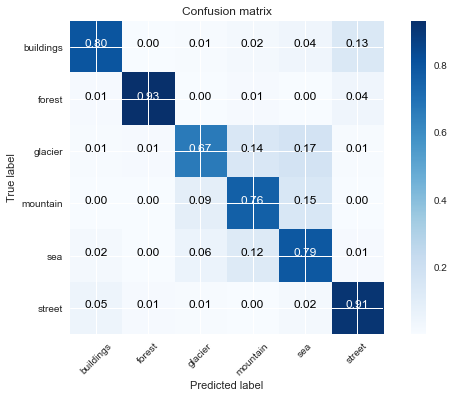

In [151]:
matrix1 = confusion_matrix(ytest0.argmax(axis=1), ybase.argmax(axis=1))
plot_confusion_matrix(matrix1, ["buildings","forest","glacier","mountain","sea","street"], normalize=True)

In [152]:
# evaluate
trainScore = baseModel.evaluate(xtrain, ytrain0)
valScore = baseModel.evaluate(xvalidation, yvalidation0)
testScore = baseModel.evaluate(xtest, ytest0)
print(trainScore)
print(valScore)
print(testScore)

4259/4259 [==============================] - 85s 20ms/step
[0.5369925806099581, 0.8016908464980715]
[0.5306111220165425, 0.8099561678892983]
[0.540100169912362, 0.8060577600515625]


# Gating to choose nature or man made


In [17]:
#Prepare y
ytrainG = np.array([0 if i in [0,1,5] else 1 for i in ytrain])
yvalidationG = np.array([0 if i in [0,1,5] else 1 for i in yvalidation])
ytestG = np.array([0 if i in [0,1,5] else 1 for i in ytest])
ytrainG0 = keras.utils.to_categorical(ytrainG, 2)
yvalidationG0 = keras.utils.to_categorical(yvalidationG, 2)
ytestG0=keras.utils.to_categorical(ytestG, 2)
# make saving directory for check point
twoSaveDir = "./2_classes_1/"
if not os.path.isdir(twoSaveDir):
    os.makedirs(twoSaveDir)
    
# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = os.path.join(twoSaveDir, '2_classes_.{epoch:02d}-{val_loss:.2f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# load the newest model data from the directory if exists
threeModel = getNewestModel(threeModel, twoSaveDir)

In [18]:
# Number of training/testing examples per batch
batch_size = 50

# Training epochs. A higher number of epochs corresponds to "more fitting to training data"
epochs = 2

# train
history=threeModel.fit(xtrain, ytrainG0,
               batch_size=batch_size,
               epochs=epochs,
               validation_data=(xvalidation, yvalidationG0),
               callbacks=[es_cb,cp_cb])

Train on 9581 samples, validate on 3194 samples
Epoch 1/2
9581/9581 [==============================] - 677s 71ms/step - loss: 0.4049 - acc: 0.8489 - val_loss: 0.1806 - val_acc: 0.9389

Epoch 00001: val_loss improved from inf to 0.18063, saving model to ./2_classes_1/2_classes_.01-0.18.hdf5
Epoch 2/2
9581/9581 [==============================] - 688s 72ms/step - loss: 0.1745 - acc: 0.9406 - val_loss: 0.1524 - val_acc: 0.9499

Epoch 00002: val_loss improved from 0.18063 to 0.15240, saving model to ./2_classes_1/2_classes_.02-0.15.hdf5


In [84]:
#Prepare y
ytrainG = np.array([0 if i in [0,1,5] else 1 for i in ytrain])
yvalidationG = np.array([0 if i in [0,1,5] else 1 for i in yvalidation])
ytestG = np.array([0 if i in [0,1,5] else 1 for i in ytest])
ytrainG0 = keras.utils.to_categorical(ytrainG, 2)
yvalidationG0 = keras.utils.to_categorical(yvalidationG, 2)
ytestG0=keras.utils.to_categorical(ytestG, 2)

In [83]:
ytwo=threeModel.predict(xtest)

NameError: name 'ytestG0' is not defined

Normalized confusion matrix


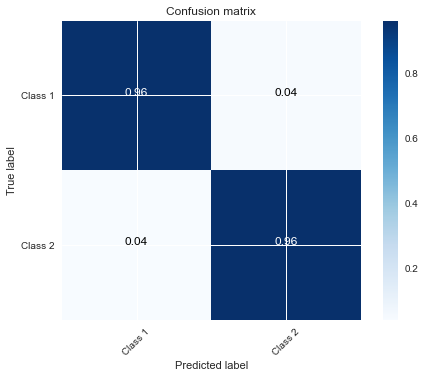

In [86]:
matrix1 = confusion_matrix(ytestG0.argmax(axis=1), ytwo.argmax(axis=1))
plot_confusion_matrix(matrix1, ["Class 1", "Class 2"], normalize=True)

In [153]:
# evaluate
trainScore = threeModel.evaluate(xtrain, ytrainG0)
valScore = threeModel.evaluate(xvalidation, yvalidationG0)
testScore = threeModel.evaluate(xtest, ytestG0)
print(trainScore)
print(valScore)
print(testScore)

4259/4259 [==============================] - 83s 20ms/step
[0.1357004901534418, 0.956058866525291]
[0.13287997452230774, 0.9542892924232936]
[0.1299015409819367, 0.9584409485794787]


# Nature classifier

In [118]:
nat = [i for i in range(len(Labels)) if Labels[i] in [2,3,4]]
Images_nat=Images[nat]
Labels_nat=Labels[nat]

In [119]:
#Split into train, validation and test
x1nat, xtestnat, y1nat,ytestnat=train_test_split(Images_nat, Labels_nat, random_state=0)
xtrainnat, xvalidationnat, ytrainnat, yvalidationnat=train_test_split(x1nat, y1nat, random_state=0)

#Prepare x
xtrainnat = xtrainnat.astype('float32')
xvalidationnat = xvalidationnat.astype('float32')
xtestnat=xtestnat.astype('float32')
xtrainnat /= 255
xvalidationnat /= 255
xtestnat /= 255

ytrainnat = keras.utils.to_categorical(ytrainnat, 6)
ytestnat = keras.utils.to_categorical(ytestnat, 6)
yvalnat = keras.utils.to_categorical(yvalidationnat, 6)



In [ ]:
# make saving directory for checkpoints
natDir = "./nat_Im/"
if not os.path.isdir(natDir):
    os.makedirs(natDir)
    
# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
chkpt = os.path.join(baseSaveDir, 'nat.{epoch:02d}-{val_loss:.2f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# load the newest model data from the directory if exists
natModel = getNewestModel(natModel, natDir)

In [23]:
# Number of training/testing examples per batch
batch_size = 50

# Training epochs. A higher number of epochs corresponds to "more fitting to training data"
epochs = 1

# train
history=natModel.fit(xtrainnat, ytrainnat,
               batch_size=batch_size,
               epochs=epochs,
               validation_data=(xvalidationnat, yvalnat),
               callbacks=[es_cb,cp_cb])

Train on 4937 samples, validate on 1646 samples
Epoch 1/1
 450/4937 [=>............................] - ETA: 4:48 - loss: 0.6216 - acc: 0.7800

KeyboardInterrupt: 

Normalized confusion matrix


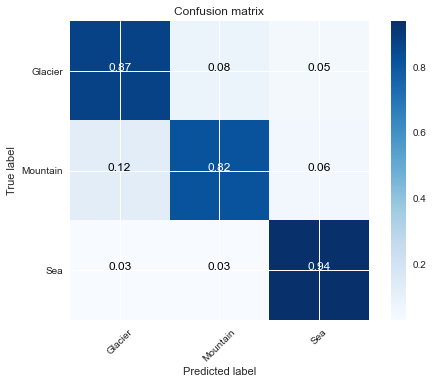

In [121]:
y_pred = natModel.predict(xtestnat)
matrix = confusion_matrix(ytestnat.argmax(axis=1), y_pred.argmax(axis=1))
plot_confusion_matrix(matrix, ["Glacier","Mountain","Sea"], normalize=True)

In [154]:
# evaluate
trainScore = natModel.evaluate(xtrainnat, ytrainnat)
valScore = natModel.evaluate(xvalidationnat, yvalnat)
testScore = natModel.evaluate(xtestnat, ytestnat)
print(trainScore)
print(valScore)
print(testScore)

2195/2195 [==============================] - 49s 22ms/step
[0.39252208656498794, 0.8657079198014188]
[0.4098764799200315, 0.8596597811431236]
[0.3905228679842721, 0.8742596812834772]


# Man made classifier

In [114]:
man = [i for i in range(len(Labels)) if Labels[i] in [0,1,5]]
Images_man=Images[man]
Labels_man=Labels[man]

#Split into train, validation and test
x1man, xtestman, y1man,ytestman=train_test_split(Images_man, Labels_man, random_state=0)
xtrainman, xvalidationman, ytrainman, yvalidationman=train_test_split(x1man, y1man, random_state=0)

#Prepare x
xtrainman = xtrainman.astype('float32')
xvalman = xvalidationman.astype('float32')
xtestman=xtestman.astype('float32')
xtrainman /= 255
xvalman /= 255
xtestman /= 255

ytrainman = keras.utils.to_categorical(ytrainman, 6)
ytestman = keras.utils.to_categorical(ytestman, 6)
yvalman = keras.utils.to_categorical(yvalidationman, 6)

In [33]:
# make saving directory for checkpoints
manDir = "./man_Im/"
if not os.path.isdir(baseSaveDir):
    os.makedirs(baseSaveDir)
    
# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
chkpt = os.path.join(manDir, 'Man_made.{epoch:02d}-{val_loss:.2f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# load the newest model data from the directory if exists
manModel = getNewestModel(manModel, manDir)

In [ ]:
# Number of training/testing examples per batch
batch_size = 50

# Training epochs. A higher number of epochs corresponds to "more fitting to training data"
epochs = 4

# train
history=manModel.fit(xtrainman, ytrainman,
               batch_size=batch_size,
               epochs=epochs,
               validation_data=(xvalman, yvalman),
               callbacks=[es_cb,cp_cb])

Normalized confusion matrix


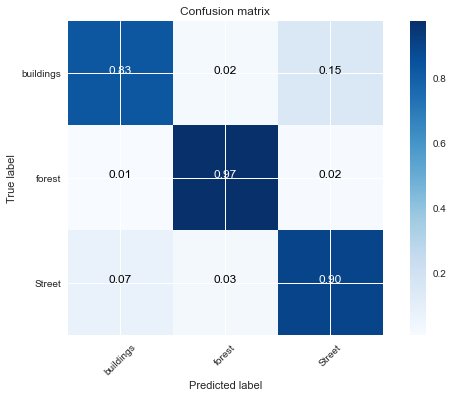

In [143]:
y_pred = manModel.predict(xtestman)
matrix = confusion_matrix(ytestman.argmax(axis=1), y_pred.argmax(axis=1))
plot_confusion_matrix(matrix, ["buildings","forest","Street"], normalize=True)

In [155]:
# evaluate
trainScore = manModel.evaluate(xtrainman, ytrainman)
valScore = manModel.evaluate(xvalman, yvalman)
testScore = manModel.evaluate(xtestman, ytestman)
print(trainScore)
print(valScore)
print(testScore)

2064/2064 [==============================] - 42s 20ms/step
[0.26272121243801333, 0.9022394487510766]
[0.29001851479982527, 0.8895348837209303]
[0.2605024987990542, 0.8997093023255814]


# Everything together

In [7]:
#Retrieve models for every block of the network

#6 class classifier
baseSaveDir = "./base_Im_1/"
baseModel = getNewestModel(baseModel, baseSaveDir)

#3class classifier
ThreeSaveDir = "./2_classes_1/"
threeModel = getNewestModel(threeModel, ThreeSaveDir)

#Man-made
manSaveDir = "./man_Im/"
manModel = getNewestModel(manModel, manSaveDir)

#Nature classifier
natSaveDir = "./nat_Im/"
natModel = getNewestModel(natModel, natSaveDir)




In [8]:
for l in baseModel.layers:
    l.trainable = False
for l in threeModel.layers:
    l.trainable = False
for l in manModel.layers:
    l.trainable = False
for l in natModel.layers:
    l.trainable = False

In [9]:
# define sub-Gate network, for the second gating network layer
def subGate(Input, orig_classes, numExperts, name="subGate"):
    name = [name+str(i) for i in range(5)]
    subgate = Flatten(name=name[0])(Input)
    subgate = Dense(512, activation='softmax', name=name[1])(subgate)
    subgate = Dropout(0.5, name=name[2])(subgate)
    subgate = Dense(orig_classes*numExperts, activation='softmax', name=name[3])(subgate)
    subgate = Reshape((orig_classes, numExperts), name=name[4])(subgate)
    return subgate

In [10]:
# the artificial gating network
manGate = subGate(im_Input, classes, 2, "manExpertGate")

# the natural gating network
natureGate = subGate(im_Input, classes, 2, "natureExpertGate")

In [11]:
# define inference calculation with Keras Lambda layer with base VGG, expert network and the second gating network of corresponding expert as input
# the inference is calculated as sum of multiplications of base VGG inference output and its importance, and expert network inference output and its importance
def subGateLambda(base, expert, subgate):
    output = Lambda(lambda gx: (gx[0]*gx[2][:,:,0]) + (gx[1]*gx[2][:,:,1]), output_shape=(classes,))([base, expert, subgate])
    return output

In [12]:
# connecting the overall networks.
# the Keras backend switch works as deciding with the first gating network, leading to artificial or natural gate
output = Lambda(lambda gx: K.switch(gx[1][:,0] > gx[1][:,1], 
                                    subGateLambda(gx[0], gx[2], gx[4]), 
                                    subGateLambda(gx[0], gx[3], gx[5])),
                output_shape=(classes,))([baseVGG, threeVGG, manVGG, natVGG, manGate, natureGate])

In [118]:
output1=Lambda(lambda gx: K.switch(gx[1][:,0] > gx[1][:,1], 
                                    gx[2], 
                                    gx[3]),
                output_shape=(classes,))([baseVGG, threeVGG, manVGG, natVGG])

In [22]:
output2=Lambda(lambda gx: gx[2]+gx[3],output_shape=(classes,))([baseVGG, threeVGG, manVGG, natVGG])

In [119]:
model = Model(im_Input, output1)

In [120]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [16]:
# make saving directory for check point
saveDir = "./Final_3/"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)
    
# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = os.path.join(saveDir, 'final.{epoch:02d}-{val_loss:.2f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# load the newest model data if exists
model = getNewestModel(model, saveDir)

In [17]:
plot_model(model, to_file='model.png', show_shapes=True)

In [24]:
# Number of training/testing examples per batch
batch_size = 50

# Training epochs. A higher number of epochs corresponds to "more fitting to training data"
epochs = 3

history=model.fit(xtrain, ytrain0,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(xvalidation, yvalidation0),
          callbacks=[es_cb, cp_cb])

Train on 9581 samples, validate on 3194 samples
Epoch 1/3
 350/9581 [>.............................] - ETA: 9:25 - loss: 0.4769 - acc: 0.8457

KeyboardInterrupt: 

In [58]:
# evaluate
trainScore = model.evaluate(xtrain, ytrain0)
valScore = model.evaluate(xvalidation, yvalidation0)
testScore = model.evaluate(xtest, ytest0)
print(trainScore)
print(valScore)
print(testScore)


4259/4259 [==============================] - 382s 90ms/step
[0.46547613497840973, 0.8531468531592954]
[0.44021531301285227, 0.8591108326249072]
[0.46543527436605586, 0.8509039680676215]


In [140]:
ii=3
print(y_im[ii])

[1. 0. 0. 0. 0. 0.]


In [141]:
# Keras function to get the BaseVGG output
getBase = K.function([model.layers[0].input, K.learning_phase()],
                     [model.layers[45].output])
# Keras function to get the first gating network output
getGate0 = K.function([model.layers[0].input, K.learning_phase()],
                      [model.layers[46].output])
# Keras function to get the artificial expert network output
getMan = K.function([model.layers[0].input, K.learning_phase()],
                       [model.layers[47].output])
# Keras function to get the natural expert network output
getNature = K.function([model.layers[0].input, K.learning_phase()],
                       [model.layers[48].output])
# Keras function to get the output for artificial gating network
getArtGate = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[48].output])
# Keras function to get the output for natural gating network
getNatureGate = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[48].output])

In [142]:
# output from the first gating network for x_test[0]
# since the second index is higher than the first, it is classified as a natural object
# the first gating should lead the inference to the natural gating network
xtest0Gate = getGate0([[test_im[ii]], 0])[0]
xtest0Gate

array([[1., 0.]], dtype=float32)

In [126]:
# inferenct from base VGG for x_test[0]
xtest0Base = getBase([[test_im[ii]], 0])[0]
xtest0Base

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [127]:
# inference from natural expert network for x_test[0]
xtest0man = getMan([[test_im[ii]], 0])[0]
xtest0man

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [128]:
# inference from natural expert network for x_test[0]
xtest0nat = getNature([[test_im[ii]], 0])[0]
xtest0nat

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

In [143]:
y_pred = model.predict(xtest)


In [144]:
matrix = confusion_matrix(ytest0.argmax(axis=1), y_pred.argmax(axis=1))

In [145]:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
         print("Confusion matrix, without normalization")
 
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label") 

Normalized confusion matrix


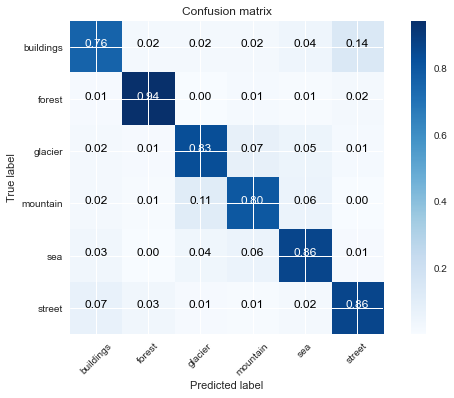

In [146]:
plot_confusion_matrix(matrix, ["buildings","forest","glacier","mountain","sea","street"], normalize=True)

# Testing on new images

In [158]:
im=[]
direct="TEST_IMAGES"
t_im=cv2.imread(direct+r'/'+'building.jpg')
im.append(t_im)
t_im=cv2.imread(direct+r'/'+'forest.jpg')
im.append(t_im)
t_im=cv2.imread(direct+r'/'+'Glacier.jpg')
im.append(t_im)
t_im=cv2.imread(direct+r'/'+'mountain.jpg')
im.append(t_im)
t_im=cv2.imread(direct+r'/'+'sea.jpg')
im.append(t_im)
t_im=cv2.imread(direct+r'/'+'street.jpg')
im.append(t_im)
test_im=np.array(im)

In [159]:
def numtotext(a):
    if a==0:
        tx='building'
    if a==1:
        tx='forest'
    if a==2:
        tx='glacier'
    if a==3:
        tx='mountain'
    if a==4:
        tx='sea'
    if a==5:
        tx='street'
    return tx

In [160]:
y_im=model.predict(test_im)

In [161]:
y_im[1].argmax()

1

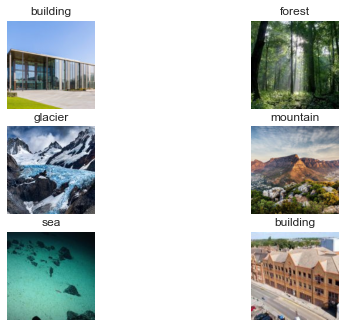

In [162]:
f, axarr = plt.subplots(3,2)
img = mpimg.imread(direct+r'/'+'building.jpg')
axarr[0,0].imshow(img)
axarr[0,0].axis('off')
axarr[0,0].title.set_text(numtotext(y_im[0].argmax()))
img = mpimg.imread(direct+r'/'+'forest.jpg')
axarr[0,1].imshow(img)
axarr[0,1].axis('off')
axarr[0,1].title.set_text(numtotext(y_im[1].argmax()))
img = mpimg.imread(direct+r'/'+'Glacier.jpg')
axarr[1,0].imshow(img)
axarr[1,0].axis('off')
axarr[1,0].title.set_text(numtotext(y_im[2].argmax()))
img = mpimg.imread(direct+r'/'+'mountain.jpg')
axarr[1,1].imshow(img)
axarr[1,1].axis('off')
axarr[1,1].title.set_text(numtotext(y_im[3].argmax()))
img = mpimg.imread(direct+r'/'+'sea.jpg')
axarr[2,0].imshow(img)
axarr[2,0].axis('off')
axarr[2,0].title.set_text(numtotext(y_im[4].argmax()))
img = mpimg.imread(direct+r'/'+'street.jpg')
axarr[2,1].imshow(img)
axarr[2,1].axis('off')
axarr[2,1].title.set_text(numtotext(y_im[5].argmax()))